In [73]:
import pandas as pd

In [74]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None)

data_columns = ["sample code", "clump thickness", "uniformity of cell size", "uniformity of cell shape", "marginal adhesion", "single epithelial cell size", "bare nuclei", "bland chromatin", "normal nucleoli", "mitosis", "class"]

data.columns = data_columns  # Asigna los nombres de columna

data = data.drop(["sample code"], axis = 1)
data2 = data.copy()

print(" numero de instancias", data.shape[0])
print(" numero de atributos", data.shape[1])

data.head()

 numero de instancias 699
 numero de atributos 10


,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [75]:
data.isnull().sum()

clump thickness                0
uniformity of cell size        0
uniformity of cell shape       0
marginal adhesion              0
single epithelial cell size    0
bare nuclei                    0
bland chromatin                0
normal nucleoli                0
mitosis                        0
class                          0
dtype: int64

In [76]:
import numpy as np

data = data.replace("?", np.nan). astype(float)

print(" numero de instancias", data.shape[0])
print(" numero de atributos", data.shape[1])

for col in data.columns:
    print(f"{col}: {data[col].isna().sum()}")
data["bare nuclei"][20:25]

 numero de instancias 699
 numero de atributos 10
clump thickness: 0
uniformity of cell size: 0
uniformity of cell shape: 0
marginal adhesion: 0
single epithelial cell size: 0
bare nuclei: 16
bland chromatin: 0
normal nucleoli: 0
mitosis: 0
class: 0


20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: bare nuclei, dtype: float64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump thickness              699 non-null    float64
 1   uniformity of cell size      699 non-null    float64
 2   uniformity of cell shape     699 non-null    float64
 3   marginal adhesion            699 non-null    float64
 4   single epithelial cell size  699 non-null    float64
 5   bare nuclei                  683 non-null    float64
 6   bland chromatin              699 non-null    float64
 7   normal nucleoli              699 non-null    float64
 8   mitosis                      699 non-null    float64
 9   class                        699 non-null    float64
dtypes: float64(10)
memory usage: 54.7 KB


In [78]:
mediana_bare_nuclei = data["bare nuclei"].median()
print("Mediana de bare nuclei:", mediana_bare_nuclei)

data = data.replace(np.nan, mediana_bare_nuclei)
data["bare nuclei"][20:25]
data.info()

Mediana de bare nuclei: 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump thickness              699 non-null    float64
 1   uniformity of cell size      699 non-null    float64
 2   uniformity of cell shape     699 non-null    float64
 3   marginal adhesion            699 non-null    float64
 4   single epithelial cell size  699 non-null    float64
 5   bare nuclei                  699 non-null    float64
 6   bland chromatin              699 non-null    float64
 7   normal nucleoli              699 non-null    float64
 8   mitosis                      699 non-null    float64
 9   class                        699 non-null    float64
dtypes: float64(10)
memory usage: 54.7 KB


In [79]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump thickness              699 non-null    int64 
 1   uniformity of cell size      699 non-null    int64 
 2   uniformity of cell shape     699 non-null    int64 
 3   marginal adhesion            699 non-null    int64 
 4   single epithelial cell size  699 non-null    int64 
 5   bare nuclei                  699 non-null    object
 6   bland chromatin              699 non-null    int64 
 7   normal nucleoli              699 non-null    int64 
 8   mitosis                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [80]:
data2 = data2.dropna()

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump thickness              699 non-null    int64 
 1   uniformity of cell size      699 non-null    int64 
 2   uniformity of cell shape     699 non-null    int64 
 3   marginal adhesion            699 non-null    int64 
 4   single epithelial cell size  699 non-null    int64 
 5   bare nuclei                  699 non-null    object
 6   bland chromatin              699 non-null    int64 
 7   normal nucleoli              699 non-null    int64 
 8   mitosis                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


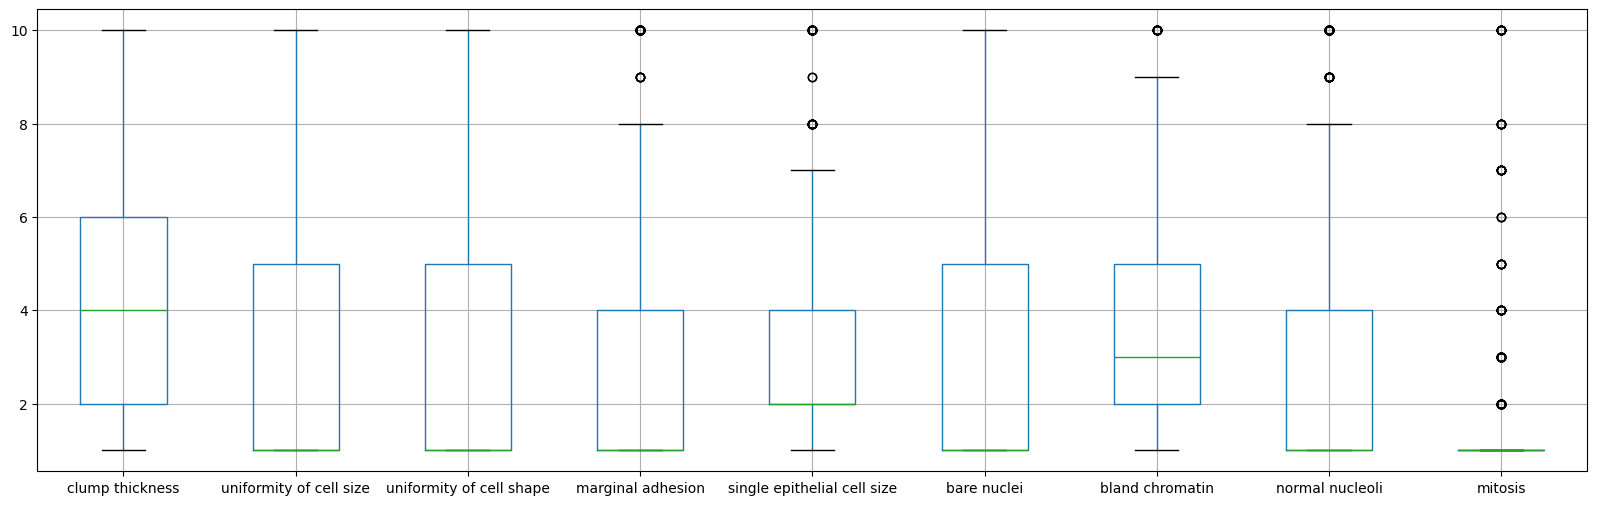

In [81]:
import matplotlib.pyplot as plt

data3 = data.drop("class", axis = 1)
data3 = data3.dropna()
data3["bare nuclei"] = pd.to_numeric(data3["bare nuclei"])
data3.boxplot(figsize=(20, 6))
plt.show()

In [82]:
Z = (data3 - data3.mean()) / data3.std()
Z[20:25]

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [83]:
print(print("Numero de instancias sin outliers:", Z.shape[0]))
Z2 = Z.loc[((Z>-3).sum(axis=1) == 9) & ((Z < 3).sum(axis=1) == 9)]
print("Numero de instancias sin outliers:", Z2.shape[0])

Numero de instancias sin outliers: 699
None
Numero de instancias sin outliers: 648


In [84]:
duplicados = data3.duplicated()
print("Numero de instancias duplicadas:", duplicados.sum())

data3[duplicados]

Numero de instancias duplicadas: 242


,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis
28,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
35,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
48,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
64,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
66,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
686,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
688,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
690,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
692,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [85]:
print("Numero de instancias sin duplicados:", data3.shape[0], data3.shape[1])

data3.drop_duplicates(inplace=True)
print("Numero de instancias sin duplicados:", data3.shape[0], data3.shape[1])
print("")

Numero de instancias sin duplicados: 699 9
Numero de instancias sin duplicados: 457 9



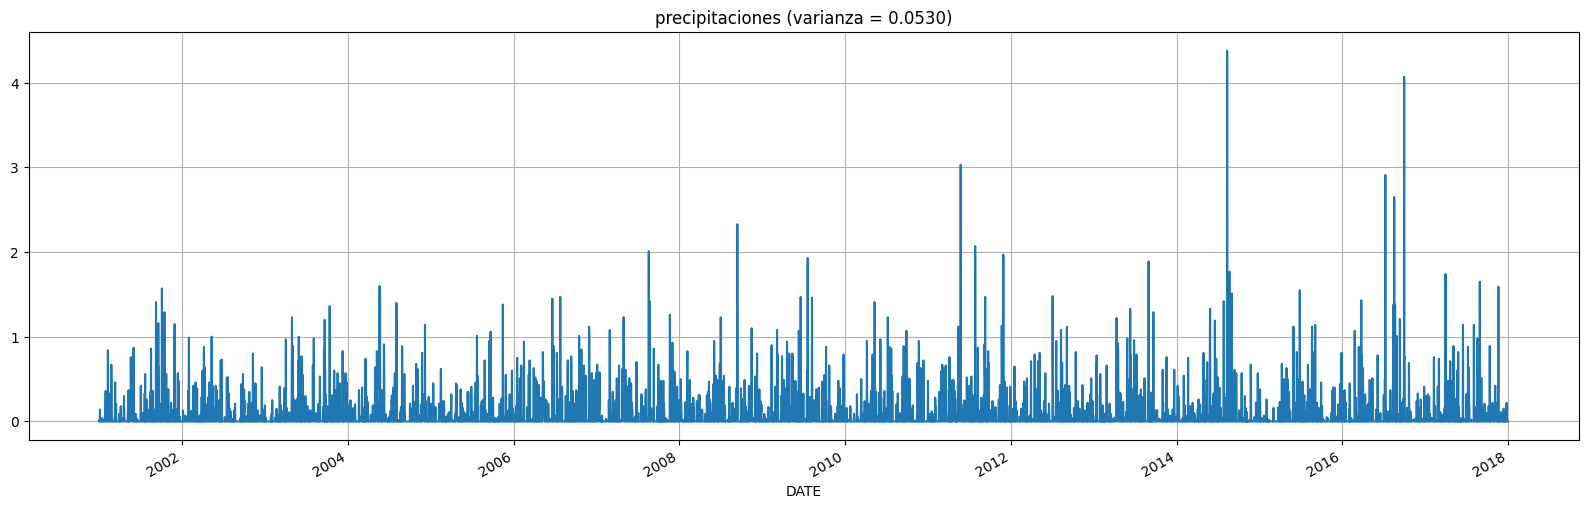

In [86]:
data_path = "C:\\Users\\crist\\OneDrive\\Escritorio\\UV_2025_S2\\Mineria\\DTW_prec.csv"

data_path = pd.read_csv(data_path, header = "infer")
data_path.index = pd.to_datetime(data_path["DATE"])
data_path = data_path["PRCP"]
ax =  data_path.plot(kind = "line" ,figsize=(20, 6))
ax.set_title("precipitaciones (varianza = {:.4f})".format(data_path.var()))
plt.grid()
plt.show()

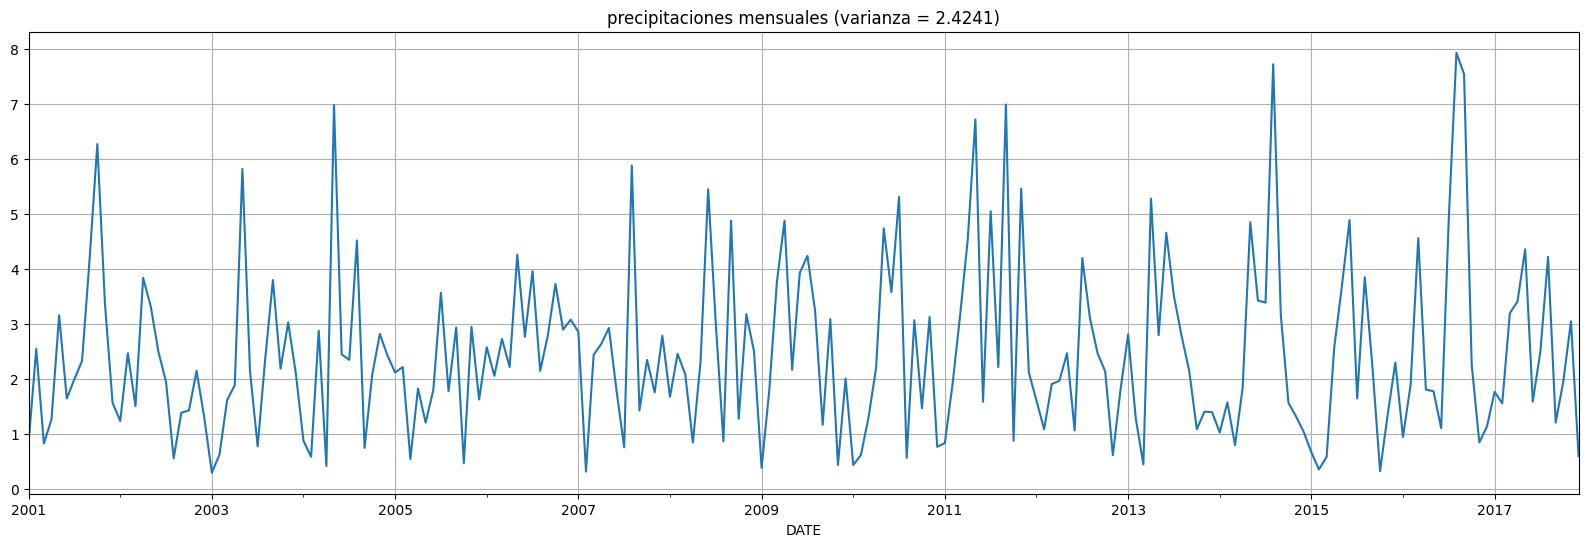

DATE
2001-01-31    0.84
2001-02-28    2.55
2001-03-31    0.83
2001-04-30    1.27
2001-05-31    3.16
              ... 
2017-08-31    4.22
2017-09-30    1.21
2017-10-31    1.96
2017-11-30    3.05
2017-12-31    0.60
Freq: M, Name: PRCP, Length: 204, dtype: float64

In [87]:
mes = data_path.groupby(pd.Grouper(freq="M")).sum()
ax = mes.plot(kind = "line" ,figsize=(20, 6))
ax.set_title("precipitaciones mensuales (varianza = {:.4f})".format(mes.var()))
plt.grid()
plt.show()

mes

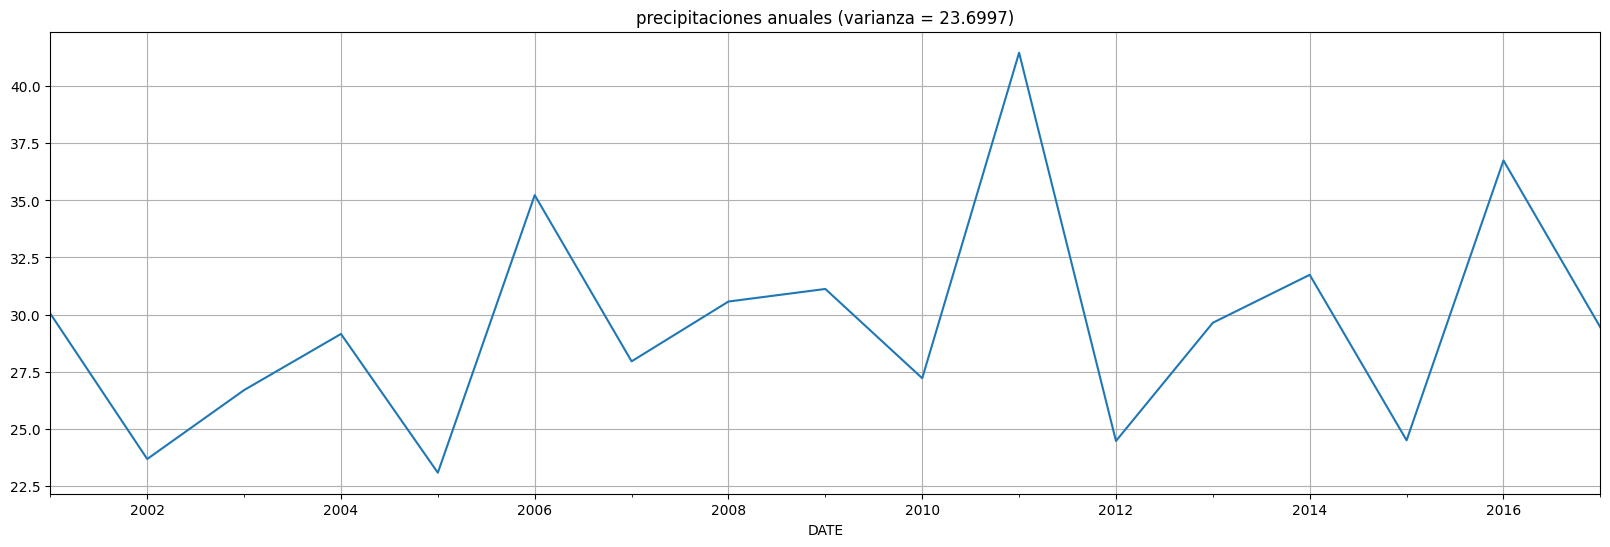

In [88]:
año = data_path.groupby(pd.Grouper(freq="Y")).sum()
ax = año.plot(kind = "line" ,figsize=(20, 6))
ax.set_title("precipitaciones anuales (varianza = {:.4f})".format(año.var()))
plt.grid()
plt.show()

In [89]:
sample = data.sample(n = 3)
sample

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
457,8.0,8.0,9.0,6.0,6.0,3.0,10.0,10.0,1.0,4.0
465,10.0,9.0,8.0,7.0,6.0,4.0,7.0,10.0,3.0,4.0
172,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [127]:
sample_1_porcent = data.sample(frac=0.1,replace=True, random_state=1)
sample_1_porcent






,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
37,6.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,2.0
235,3.0,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
72,1.0,3.0,3.0,2.0,2.0,1.0,7.0,2.0,1.0,2.0
645,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
144,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
126,7.0,5.0,3.0,7.0,4.0,10.0,7.0,5.0,5.0,4.0
279,10.0,5.0,7.0,3.0,3.0,7.0,3.0,3.0,8.0,4.0
381,10.0,6.0,3.0,6.0,4.0,10.0,7.0,8.0,4.0,4.0
356,5.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0


In [129]:
sample_1_porcent.duplicated().sum()

8

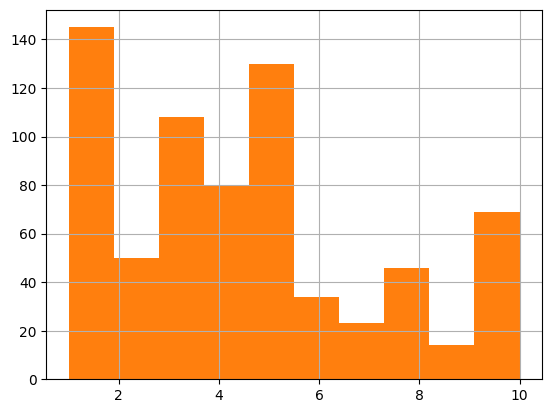

In [131]:
data["clump thickness"].hist(bins=10)
data["clump thickness"].value_counts(sort=False)
plt.show()

In [ ]:
data["clump thickness"]